# Lab 2: cleaning operations
In this lab, we will practice what we learned in the lectures about sampling, outlier detection, balancing and missing data handling.  We will do this again by looking at the Iris dataset although we will provide you with slightly altered examples that contain missing data, outliers, etc so you can see how to deal with the various aspects we are learning.  You can then practice further by applying similar operations to another dataset.  

We assume you now know how to use Jupyter Notebooks and you have practiced what we learned in the first lab about loading data using Pandas, Visualisations using Seaborn, etc.  We recommend that you have looked at the Kaggle courses for data cleaning https://www.kaggle.com/learn/data-cleaning and introduction to machine learning https://www.kaggle.com/learn/intro-to-machine-learning before you attempt this lab.

## Starting out: loading data and libraries

We begin by loading the necessary libraries for the work we are going to do in this lab. 

In [1]:
import pandas as pd
import numpy as np
# pd.set_option('max_rows', 10)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


Now we read the Iris data which we can use to exemplify various operations.  We first load the data, and we use a `sns.countplot` to understand the distribution of the target variable _species_.  Note that in the original dataset the classes are balanced with 50 examples each.  You may need to alter the path below to the path where you have stored the Iris dataset.

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


<Axes: xlabel='species', ylabel='count'>

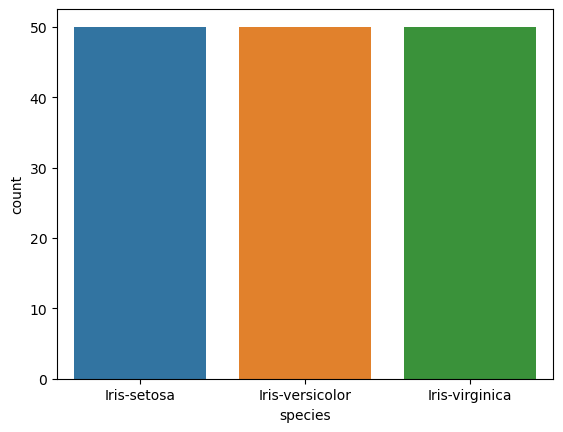

In [2]:
#designate the path where you saved your Iris data
Iris_data_path = "/Users/ringi/Documents/code/data-mining/datasets/iris.csv"

#Load the data using pandas read_csv function. 
Iris_data = pd.read_csv(Iris_data_path)

#Show the first and last few records to check data is loading correctly
print(Iris_data.head())
print(Iris_data.tail())

#Show distribution of the class on whole dataset
sns.countplot(x= 'species', data=Iris_data)

# Designate input and output variables

As we begin looking at classification tasks, it is often the case that for the purposes of running models, etc., we often set the target variable as y, in our case the _species_ variable, and the other input variables as X. We do that next. We then observe the data in X using the `describe()` method on the data frame containing the input variables.

In [3]:
#Designate the outcome or target variable as y
y = Iris_data.species

In [4]:
#Designate the input features as X
iris_features=['sepal_length', 'sepal_width','petal_length','petal_width']
X= Iris_data[iris_features]


In [5]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Sampling the data (train & validation split)

Now, let us do some sampling to start with.  This is necessary before running any machine learning algorithms and in its simplest form, consists of randomly partitioning the data into a train/validation or train/test or train/validation/test set.   We begin with a train and validation/test dataset.  In our first example, we create those without using any stratification.  We can specify the size of the test/validation set with the parameter `test_size= x`.  The training set size will be the compliment of this, so if we use for example 0.3, then 30% of the data will end up in the validation set and the remaining 70% in the train set.  For this we need the `train_test_split` from scikitlearn.  The method returns a number of splits for the train and validation/test input data and the train and validation target variable, given input variables (X) and decision variable (y). The `random_state=1` parameter ensures reproducibility of results as it controls the shuffling of the data before partition.  Passing an integer gives you a reproducible split.

You can experiment with different train/validation splits by altering the `test_size` parameter.
 

In [6]:
from sklearn.model_selection import train_test_split

# Without stratification
train_X,val_X, train_y, val_y= train_test_split (X,y, test_size=0.3,random_state=1)


In [7]:
#Let's look into the contents of the training input data.
train_X.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.800000,3.033333,3.739048,1.189524
std,0.844553,0.415254,1.787429,0.784333
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.600000,0.200000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


count                105
unique                 3
top       Iris-virginica
freq                  37
Name: species, dtype: object


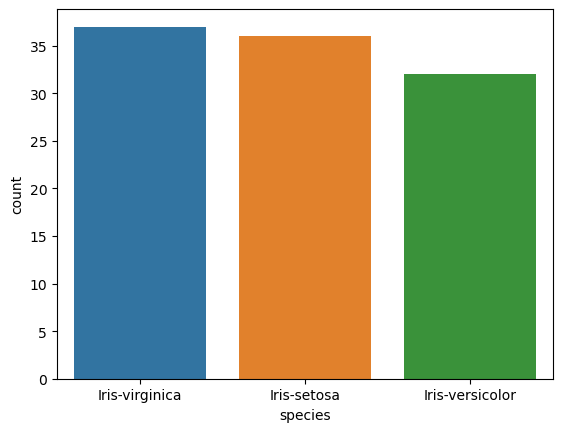

In [8]:
# And now look at the training set target variable
print(train_y.describe())
train_labels=train_y.to_frame()
sns.countplot(x='species',data=train_labels)
plt.show()

count                  45
unique                  3
top       Iris-versicolor
freq                   18
Name: species, dtype: object


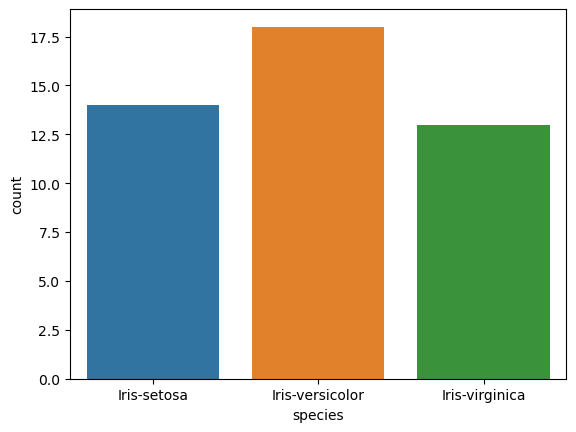

In [9]:
# And at the validation set target variable
print(val_y.describe())
val_labels=val_y.to_frame()
sns.countplot(x='species',data=val_labels)
plt.show()

### Samplying with stratification 

Note that our random split of the data should guarantee a similar number of instances of each class end up in the train and validation set, so if we start with balanced data we should have balanced samples.  However, if we want to ensure that, we can use stratification in the sampling.  We can use stratification on the target variable _'species'_ so that we get a Stratified Random Sample. 

In [10]:
#With stratification
train_X,val_X, train_y, val_y= train_test_split (X,y, test_size=0.3,random_state=1, stratify=y)

count             105
unique              3
top       Iris-setosa
freq               35
Name: species, dtype: object


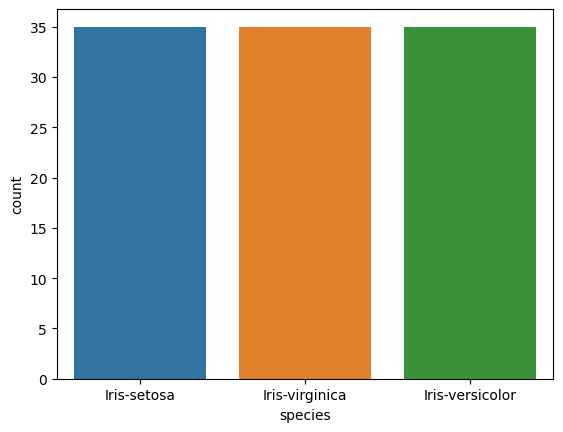

In [11]:
# We show the composition of the target variable for the validation set
print(train_y.describe())
train_labels=train_y.to_frame()
sns.countplot(x='species',data=train_labels)
plt.show()



count                 45
unique                 3
top       Iris-virginica
freq                  15
Name: species, dtype: object


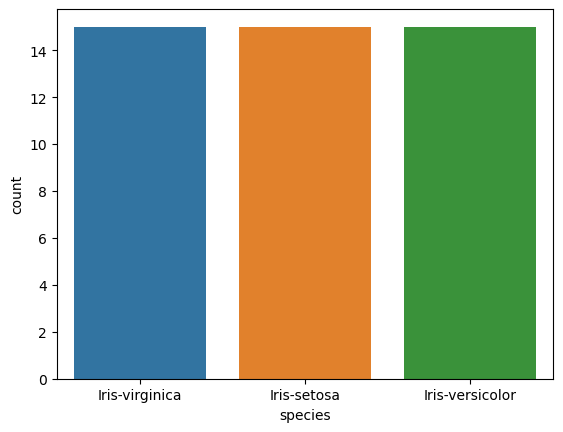

In [12]:
# And at the validation set target variable
print(val_y.describe())
val_labels=val_y.to_frame()
sns.countplot(x='species',data=val_labels)
plt.show()

# Reducing sample size
In the lectures we have also talked about using sampling to reduce the dataset size.  The Condensed Nearest Neighbour (CNN) algorithm tries to do while preserving the necesary information for classification so we will try it out here.   We need to import  `CondensedNearestNeighbour` from a library that implements a number of algorithms for imbalanced learning, for which this algorithm can also be used. The library where you can find more methods for imbalanced learning is https://imbalanced-learn.org/stable/.  Note that you may need to get this package into Anaconda. Information on how to do this can be found here https://imbalanced-learn.org/stable/install.html

In [13]:
from imblearn.under_sampling import CondensedNearestNeighbour

print(__doc__)

#We use the CNN algorithm to sample data 
# the 'all' parameter below means we resample all classes equally. 
#We could use this to resample more of the majority or minority classes.
cnn = CondensedNearestNeighbour(sampling_strategy='all',random_state=42) 
X_res, y_res = cnn.fit_resample(X, y) 
print(X_res)
print (y_res)

#The return of the fit_resample method are arrays so we convert back to a data frame to apply a countplot.
val_labels=y_res.to_frame()
print(val_labels.species)
sns.countplot(x='species',data=val_labels)
plt.show()

ModuleNotFoundError: No module named 'imblearn'

To fully understand how this algorithm works we can visualise the original data and superimpose in that scatterplot one that shows the data chosen by this algorithm.  We can see that the example returned is indeed very compact. The points highlighted by the dark markers are those selected by the CNN sampling algorithm.

In [14]:
#In the visualisation below we superimpose a plot of all the iris data to the one returned in X_res after the sampling
sns.scatterplot(x=X_res['petal_width'], y=X_res['petal_length'], style=val_labels.species,color=".2", marker="+")
sns.scatterplot(x=Iris_data['petal_width'], s= 10,y=Iris_data['petal_length'],hue=Iris_data.species)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

NameError: name 'X_res' is not defined

We can appreciate that only 4 points from the original data have been sampled, one for _setosa_, and for _virginica_ and two for _versicolor_.

# Outlier handling

Now we turn our attention to outlier handling and we will look at various algorithms for this.  Outlier detection is intrinsicly difficult and more so for high dimensionality datasets.  It is also the case that most algorithms work with numeric attributes so it may be necessary to transform any categorical attributes first into numeric, if they are going to be used.  We have produced a new slightly modified Iris dataset for this by adding 5 outliers at the end of the 150 records in the original data.  You can dowload this file from Blackboard.  The file is __irisOL.csv__. We will load this data and look at the outliers first. 

In [15]:
# load and summarize the dataset
# load the new dataset with outliers.

#designate the path where you saved your Iris data with outliers
Iris_data_path = "/Users/ringi/Documents/code/data-mining/datasets/irisOL.csv"

#Load the data using pandas read_csv function. 

Oulier_Iris = pd.read_csv(Iris_data_path)

print(Oulier_Iris.tail())

     sepal_length  sepal_width  petal_length  petal_width     species
150           9.0          0.0          13.0          5.0   virginica
151           7.0          8.0           1.0          1.0   virginica
152           8.0          9.0           0.2          0.3      setosa
153           1.0          1.0           1.0          0.3  versicolor
154           8.0          9.0           8.0          0.3      setosa


### Box plots
For each attribute it is posible to visualise outliers using boxplots.  Wikipedia says _"In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points."_ so the points in the graph outside the boxes look like outliers.

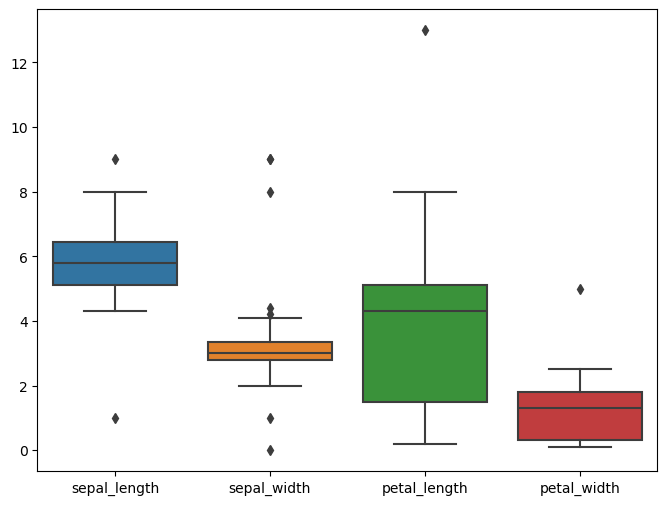

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=Oulier_Iris)
plt.show()

Now, we can use a scatterplot to see the outliers we have introduced in the data. There are 5 points which should be quite obvious in the graph. 

<Axes: xlabel='petal_length', ylabel='petal_width'>

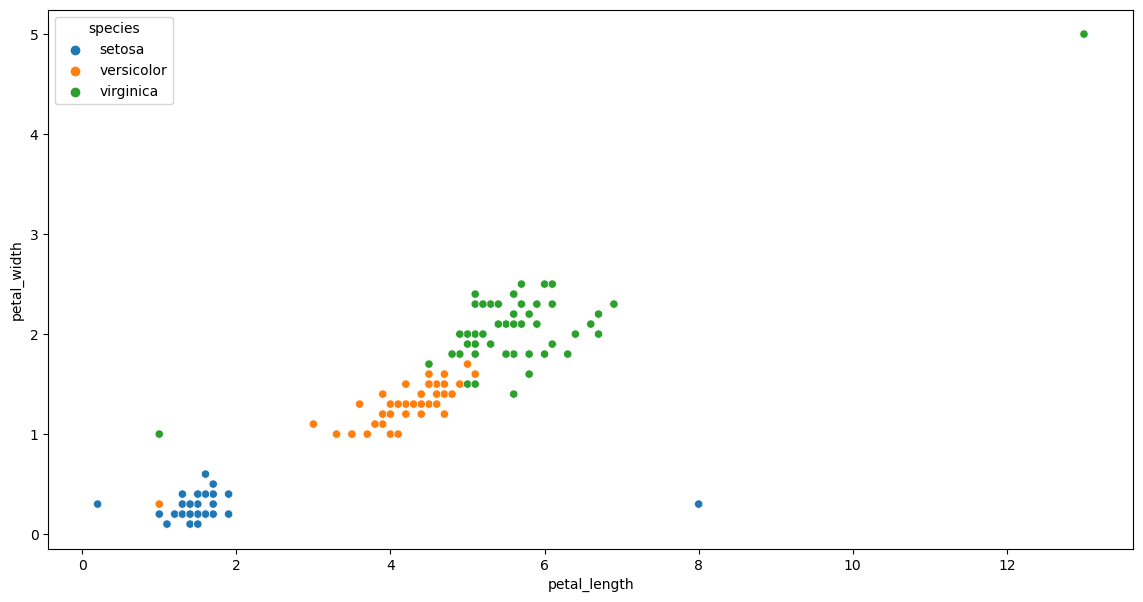

In [17]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))
sns.scatterplot(x=Oulier_Iris['petal_length'], y=Oulier_Iris['petal_width'],hue=Oulier_Iris['species'])

Now, let us separate the input features for this new dataset containing the outliers, as we did before for the previous dataset and look at those. 

In [18]:
features=['sepal_length','sepal_width','petal_length','petal_width']
X=Oulier_Iris[features]
#Designate the outcome or target variable as y
y = Oulier_Iris.species
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
150           9.0          0.0          13.0          5.0
151           7.0          8.0           1.0          1.0
152           8.0          9.0           0.2          0.3
153           1.0          1.0           1.0          0.3
154           8.0          9.0           8.0          0.3

[155 rows x 4 columns]
0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
150     virginica
151     virginica
152        setosa
153    versicolor
154        setosa
Name: species, Length: 155, dtype: object


### Clustering with DBScan
Let us first try one of the methods described in the following tutorial https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623.  It is a clustering algorithm called DBScan. It is used as a density-based anomaly detection method with either single or multi-dimensional data. There are two hyperparameters to set in this algorithm.  The first hyperparameter is `min_samples`. This is simply the minimum number of core points needed in order to form a cluster. The second important hyperparameter is `eps`. `eps` is the maximum distance between two samples for them to be considered as in the same cluster. We print the output of the algorithm and any point that is identified as -1 is an outlier. 

In [19]:
#import the implementation of this algorihm from sklearn
from sklearn.cluster import DBSCAN

#Use the algorithm for outlier detection, the retun in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(min_samples = 4, eps = 3)
clusters = outlier_detection.fit_predict(X)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1 -1 -1 -1 -1]
Total number of outliers identified is:  5


Note that the last 5 points which are the outliers are recognised as such by this algorihtm. The algorithm may not be so good with higher dimensionality data.  Since the identification of those 5 points is what we expect, let us call that the 'ground truth' to use against other algorithms trying to predict the outliers.

In [20]:
ground_truth = clusters
print ("Ground truth: \n", ground_truth)

Ground truth: 
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1 -1 -1 -1 -1]


### Isolation Forest

Another algorithm is `IsolationForest`. It is an unsupervised learning algorithm that belongs to the ensemble decision trees family.  You will learn more about this in subsequent lectures. The algorithm is supposed to isolate anomalies instead of profiling and constructing normal points and regions. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. The paper that describe the algorithm, for those interested in more details is https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf. 

Perhaps the most important hyperparameter in the model is the `contamination` argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

In [21]:
#import the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=150, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X)
print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

#Calculate number of erroneos predictions where outlier predicction does not coindice with groundtruth
newarray= ((preds == -1) & (ground_truth==0))

n_errors= len([i for i in newarray if i==True])
print("Number of incorrectly identified outliers: ",n_errors)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1]
Total number of outliers identified is:  15
Number of incorrectly identified outliers:  10


IsolationForest identifies all the 5 records as outliers but also another 10 which do not correspond to the grount truth we established.

### Local Outlier Factor

Not let us look at an additional algorithm, the LocalOutlierFactor. The algorithm finds anomalous data points by measuring the local deviation of a given data point with respect to its neighbours.  The algorithm description for those interested can be found here https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf

An anomaly score for each sample is calculated as the Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

In the code below outliers are identified with their scoring factor. Then a graph is produced which superimposes a scatterplot of the original data with the same points withe their outlier score represented by a circle, the bigger the circle, the higher the score for a point being an outlier. 

Predicted outliers: 
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1]
Number of predicted outliers: 16
Number of incorrectly identified outliers:  11


/var/folders/_4/f804blyd7p32_4z_qf8cbg140000gq/T/ipykernel_83579/503638801.py:47: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [12]
/var/folders/_4/f804blyd7p32_4z_qf8cbg140000gq/T/ipykernel_83579/503638801.py:48: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


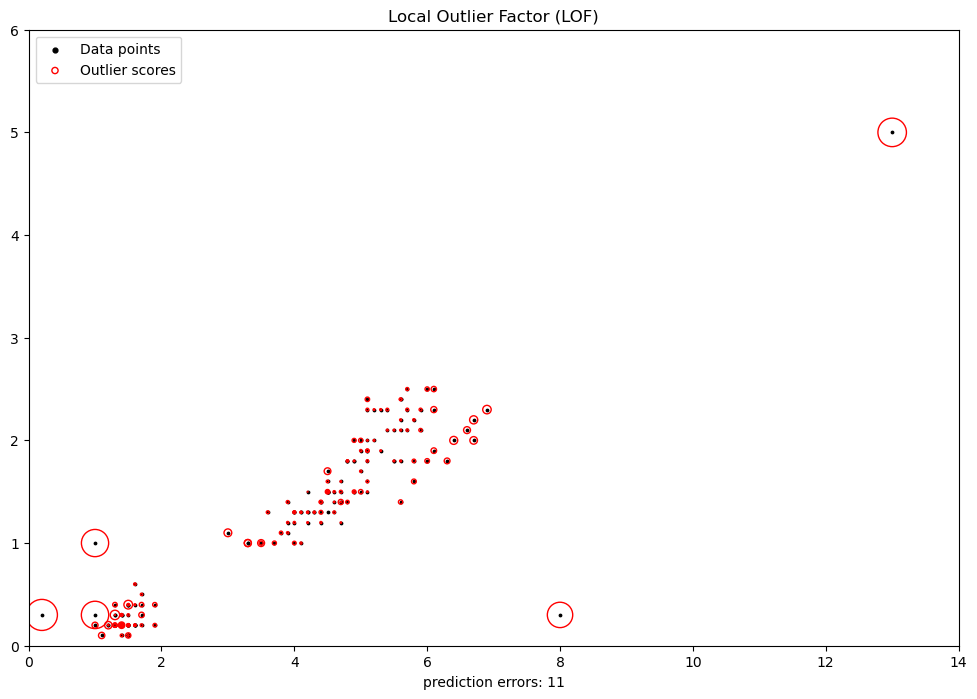

In [26]:
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)

print ("Predicted outliers: \n",y_pred)

#Calculate number of outliers
outlierN = len([i for i in y_pred if i == -1])
print ("Number of predicted outliers:",outlierN)

#Calculate number of erroneos predictions
newarray= ((y_pred == -1) & (ground_truth==0))
#print(newarray)
n_errors= len([i for i in newarray if i==True])
print("Number of incorrectly identified outliers: ",n_errors)

#Let us see graphically how the outliers are identified
#Use outlier scores calculated by the algorithm to plot a circle around the outlier proportional to score.

X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(12,8))
plt.title("Local Outlier Factor (LOF)")

#Convert the df to an array for the purpose of the scatterplot
Xol = Oulier_Iris.to_numpy()

#Use scatter 
plt.scatter(Xol[:, 2], Xol[:, 3], color='k', s=3, label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xol[:, 2], Xol[:, 3], s=500 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((0, 14))
plt.ylim((0, 6))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [12]
legend.legendHandles[1]._sizes = [20]
plt.show()

### Covariance estimation 

Finally, we adapt some code found in https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html for the Iris dataset.  

In this example 3 covariants estimators are used: the Empirical Covariance, Minimum Covariance Determinant and One Class SVM. Each of them learns a _frontier_ for outlier detection that is shown in a graph. Note that the example uses a visualisation onto two dimensions, _petal_length_ and _petal_width_.

/var/folders/_4/f804blyd7p32_4z_qf8cbg140000gq/T/ipykernel_83579/3129859047.py:51: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  plt.legend((legend1_values_list[0].collections[0],
/var/folders/_4/f804blyd7p32_4z_qf8cbg140000gq/T/ipykernel_83579/3129859047.py:52: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  legend1_values_list[1].collections[0],
/var/folders/_4/f804blyd7p32_4z_qf8cbg140000gq/T/ipykernel_83579/3129859047.py:53: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  legend1_values_list[2].collections[0]),


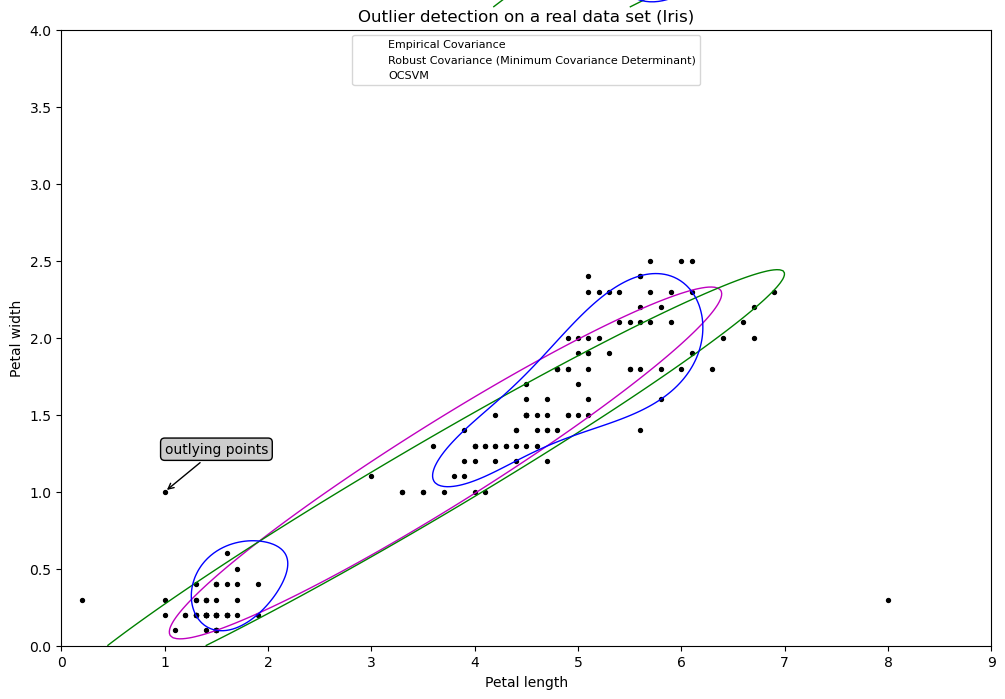

In [23]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause

from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.font_manager

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}


#Convert dataframe to array
features=['petal_length','petal_width']
X1=Oulier_Iris[features].to_numpy()

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 9, 300), np.linspace(0, 4, 300))


plt.figure(figsize=(12,8))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=1, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (Iris)")
plt.scatter(X1[:, 0], X1[:, 1], color='black', s=8)
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("outlying points", xy=(1, 1),
             xycoords="data", textcoords="data",
             xytext=(1, 1.25), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=8))
plt.ylabel("Petal width")
plt.xlabel("Petal length")

plt.show()

# Balancing the data

Now we will look at how to balance the data when the target or output classes appear imbalanced.  For this we use a specially constructed version of the Iris dataset. We remove many of the examples of the class _setosa_ to create an imbalanced dataset for the purpose of learning about this.  We leave intact the examples of the other two classes so now the class _setosa_ is the minority class with 10 examples only.  

First we read the data and show a visualisation of the class distribution. 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           5.4          3.4           1.7          0.2  setosa
2           5.1          3.7           1.5          0.4  setosa
3           4.6          3.6           1.0          0.2  setosa
4           5.1          3.3           1.7          0.5  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
105           6.7          3.0           5.2          2.3  virginica
106           6.3          2.5           5.0          1.9  virginica
107           6.5          3.0           5.2          2.0  virginica
108           6.2          3.4           5.4          2.3  virginica
109           5.9          3.0           5.1          1.8  virginica


<Axes: xlabel='species', ylabel='count'>

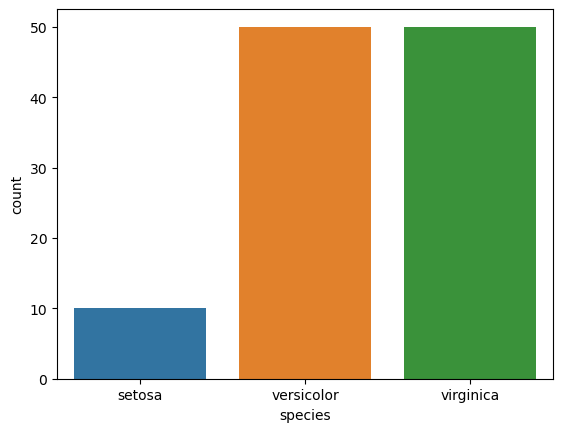

In [25]:
#designate the path where you saved your Iris data
Iris_data_path = "/Users/ringi/Documents/code/data-mining/datasets/iris_Imb.csv"

#Load the data using pandas read_csv function. 

df = pd.read_csv(Iris_data_path)

print(df.head())
print(df.tail())

#Show distribution of the class on whole dataset
sns.countplot(x= 'species', data=df)

Now we look at the count of examples for each of the species. 

In [ ]:
df['species'].value_counts()

## Upsampling the minority class

We now need to start by upsampling a minority class. For this we can use the `resample` library from scikitlearn.  In this case, some of the minority class samples are copied until we get the the balanced dataset, so the minority class has `n_samples` at the end.  We use sample with replacement which means any data point that is chosen for copying can be picked again.


In [27]:
from sklearn.utils import resample

# Separate majority and minority classes. We will use both classes, 'virginica' and 'versicolor' combined as majority class

df_majority = df[df.species!="setosa"]
df_minority = df[df.species=="setosa"]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=50,     # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Show dataset statistics
print(df_upsampled.describe())
 
# Display new class counts
df_upsampled.species.value_counts()


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.844667     3.050000      3.772000     1.211333
std        0.813769     0.389588      1.749022     0.747841
min        4.600000     2.000000      1.000000     0.200000
25%        5.100000     2.800000      1.700000     0.400000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.400000      5.100000     1.800000
max        7.900000     3.800000      6.900000     2.500000


species
versicolor    50
virginica     50
setosa        50
Name: count, dtype: int64

We can show the new upsampled data using plots. As we can observe the classes are now balanced at 50 examples each.

<Axes: xlabel='species', ylabel='count'>

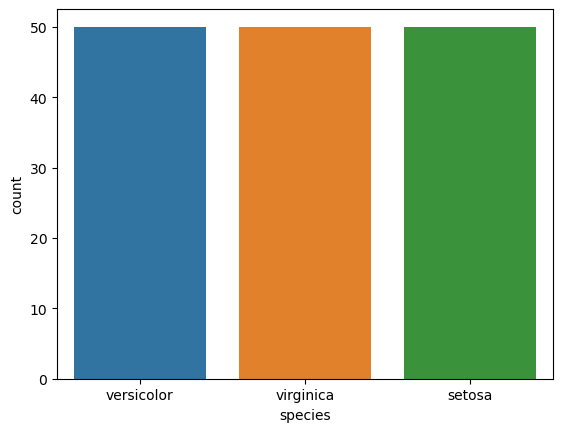

In [28]:
#Show distribution of the class on whole dataset
sns.countplot(x= 'species', data=df_upsampled)

Additionally, we can use a scatterplot to show the points that we have after upsampling and the original data points, superimposed. This shows that all the points that have been upsampled correspond to points in the original data. However, we now have 50 data points for _setosa_.

In [ ]:
sns.scatterplot(x=df_upsampled['petal_width'], y=df_upsampled['petal_length'], style=df_upsampled['species'],color=".2", marker="+")
sns.scatterplot(x=df['petal_width'], s= 10,y=df['petal_length'],hue=df.species)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

To better understand the effect of the upsampling, let us look at what the original dataset may have looked like when we had all the data (i.e. the original Iris dataset that we loaded at the beginning of the lab before we made it into an unbalanced dataset).  We can see the scatter of data for _petal_length_ using a stripplot from seaborne. 

In [ ]:
sns.stripplot(x=Iris_data['species'],y=Iris_data['petal_length'],data=Iris_data, jitter=0.2, order=['setosa','versicolor','virginica'])
sns.despine()

We can plot a similar graph for the upsampled data to compare them.  We can see tht the distribution of points in the Setosa has changed as the same point may be plotted multiple times.  Note that the points show an amount of _jitter_ so that they are not overimposed. We can see by the spread of the points for a particular value of _petal_length_ that there is some repetition.

In [ ]:

sns.stripplot(x=df_upsampled['species'],y=df_upsampled['petal_length'],data=df_upsampled, jitter=0.2,order=['setosa','versicolor','virginica'])
sns.despine()

## Downsampling the majority classes
Next we downsample the majority class and show the resulting data showing similar methods.  That is, we discard some examples of the majority classes to produced the balanced dataset.

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=10,     # to match minority class
                                 random_state=123) # reproducible results
    
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.species.value_counts()

We now use a plot of the distribution of the _species_ to show the balance of the classes.  Note tha the two classes now add up to the same as the minority class (i.e. 10 examples in total, 5 each).

In [ ]:
#Show distribution of the class on whole dataset
sns.countplot(x= 'species', data=df_downsampled)

We can again use a scatter plot of the original Iris data and then superimpose the downsampled data to see what we are left with.  Note that all of the original data points for Setosa (the 10 in the imbalanced data) are there, but only 5 for each of the other classes have been taken for the downsampled data. 

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_downsampled['petal_width'], y=df_downsampled['petal_length'], style=df_downsampled['species'],color=".2", marker="+",s=150)
sns.scatterplot(x=df['petal_width'], s= 20,y=df['petal_length'],hue=df.species)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Now we look at the stripplot again to undestand the data that we have left afer downsampling.

In [ ]:
sns.stripplot(x=df_downsampled['species'],y=df_downsampled['petal_length'],data=df_downsampled, jitter=0.2,order=['setosa','versicolor','virginica'])
sns.despine()

# Missing values

In this part of the lab we are going to deal with another altered iris dataset, one in which we have introduced missing values randomly for all of the attributes.  We will load the data and then we will look at simple methods for dealing with these missing values. 

In [ ]:
#designate the path where you saved your Iris data with missing values
Iris_data_path = "/Users/bli/Desktop/JupiterProjects/JupiterLabs/Datasets/irisOL_Miss.csv"

#Load the data using pandas read_csv function. 
Iris_data_M = pd.read_csv(Iris_data_path)

print(Iris_data_M.head())
print(Iris_data_M.tail())

#Show distribution of the class on whole dataset
sns.countplot(x= 'species', data=Iris_data)

We start bt looking at the amount of missing values in each column.  For this we can use the `isnull()` method available for a dataframe and use the `sum()` method to add those.


In [ ]:
# get the number of missing data points per column
missing_values_count = Iris_data_M.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:5]

The next thing we may want to do is to calculate the total percentage of missing values in the dataset as a whole. The `shape`method returns the number of rows and columns and we can multiply those with the `product()` method from numpy to calculate the total number of cells in the dataframe.  With that and the total number of missing cells, we can calculate the %. 

In [ ]:
#Calculation of total cells in the dataframe
total_cells = np.product(Iris_data_M.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

## Removal of missing values 

A first approach for missing data is missing data removal, so we can remove all all rows containing missing data.  What are we left with? 

In [ ]:
# remove all the rows that contain a missing value
Iris_data_M.dropna()

An alternative approach may  may be to remove columns with missing data. How many columns are left?

In [ ]:
columns_with_na_dropped = Iris_data_M.dropna(axis=1)
columns_with_na_dropped.head()

In [ ]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % Iris_data.shape[1])
print("Columns after na's dropped: %d" % columns_with_na_dropped.shape[1])

## Imputation of missing values

The second approach to imputation, specially when there is a lot of missing data is to impute the missing data in some way so we do not have to remove unecessarily information that accompanies the missing data.  To start, let us calculate the stats for each field to compare it with, with the values after imputation.  Imputation should not alter the data statistics to greatly if it is to work well. We look at the stats for the original iris data (without missing values) which could serve as a form of _ground truth_ for the imputation.

In [ ]:
Iris_data_M.describe()

The first form of very simple (but probably not correct) imputation is to fill the missing values with 0.  We do this and then look at stats for the whole file after imputation.

In [ ]:
# replace all NA's with 0
Filled0_Iris=Iris_data_M.fillna(0)
Filled0_Iris.describe()

This has altered the mean of a number of the attributes so it is probably not a great imputation method.  

Now, we can try to fill the missing values with the value before it (in the cell before) and then with 0 and look at the stats.  This is a method provided by scikitlearn. 

In [ ]:
# replace all NA's with the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
FilledNext_Iris= Iris_data_M.fillna(method='bfill', axis=0).fillna(0)
FilledNext_Iris.describe()

That seems as a better method, as the means for example are closer to the original data.  We can now try a more sophisticated method, e.g. a K-Nearest Neighbour algorithm for imputation. For this we use the method `KNNImputer` from the `sklearn.impute` library.

In [ ]:
#import the relevant methods
from sklearn.impute import KNNImputer
nan = np.nan

#Designate the features to become X
iris_features=['sepal_length', 'sepal_width','petal_length','petal_width']
X= Iris_data_M[iris_features]

#Apply KNN imputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
ImputedX=imputer.fit_transform(X)

# Convert output to a data frame to show the stats
dataframe = pd.DataFrame.from_records(ImputedX)
dataframe.columns = iris_features
dataframe.describe()                        
